## **Case study**

An organization looking to develop  a video game and provides said data for analytics in oreder to find and answer certain questions that provide insight however minimal for the success of the 'to-be-created' game. Some of the "top of the head" questions are as follows:
 1. Which publisher and platforms incur the most sales?
 2. which genre of games is worth the investment?
 3. Which games produced the most sales?
 4. Top games with the most sales in each continent?
 5. Which year and season had the most sales?

# Citation
*KEVURU GAMES(19 Feb 2023),Best-Selling Games in 2023: Key factors of success.* "The success of  game depends on many factors-  like the authority of developers and the **publisher**, competition with other game of the same **genre**, the **season** etc"

- According the author some of the factors of succesful games include publishers, game genre, seasons and many more.
Lets visualize some of these factors.


# Starting Point

In [ ]:
# import data
from google.colab import files
upl = files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
# read data
df = pd.read_csv('vgsales.csv')
# preview data
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# shape of data
df.shape

(16598, 11)

In [ ]:
# check for missing data
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# drop all missing values
df.dropna(axis= 0, inplace=True)

In [ ]:
# check for missing data
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# # droping uncessary columns
# df = df.drop(columns=['Rank','Name'], axis=1)
# # preview updated data
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 1. Publishers and Platform analysis

### Publishers

In [ ]:
# display all publishers present in the data
df.Publisher.unique().tolist()

In [ ]:
# A function to visualize the different sales data
def most_sales(col, sale, data):
  # top 10 games with most sales
  df_col = data.groupby(by=[f'{col}'])[f'{sale}'].sum()
  df_col = df_col.reset_index()
  df_col = df_col.sort_values(by=[f'{sale}'], ascending=False)
  df_col.head(10) # display top 10

  # assign plot size
  plt.figure(figsize=(12,5))
  ax = sns.barplot(x= f'{sale}',y=f'{col}', data = df_col.iloc[:10]) # top 10
  # loop to iterate through the list of
  # labels and assign each bar to a different label
  for i in ax.containers:
      ax.bar_label(i,)

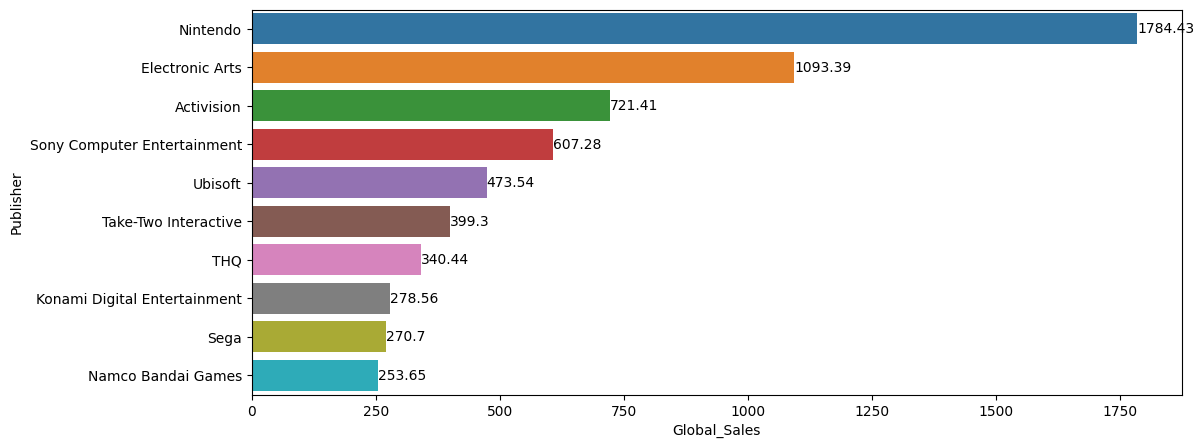

In [ ]:
# global publisher sales
most_sales('Publisher', 'Global_Sales', df)

####  further publisher sales visualizations

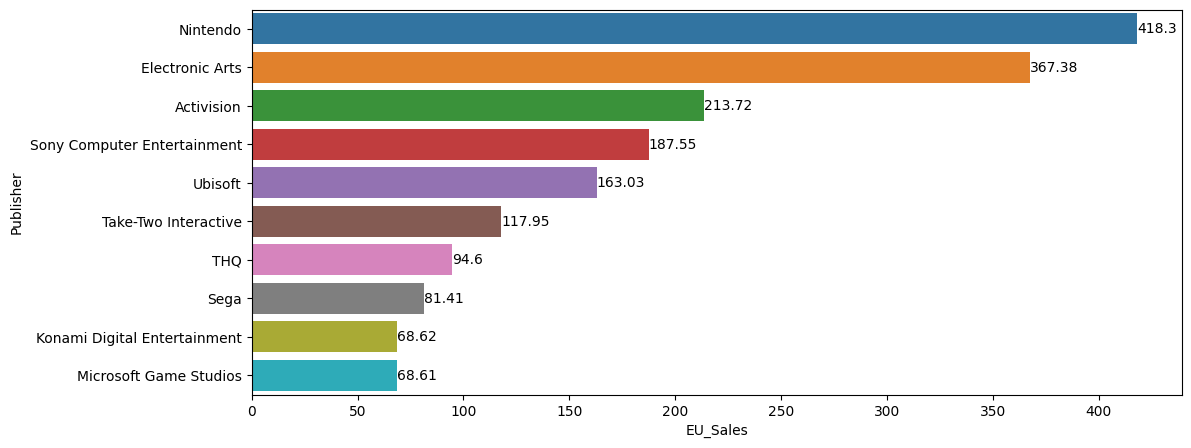

In [ ]:
# EU publisher sales
most_sales('Publisher', 'EU_Sales', df)

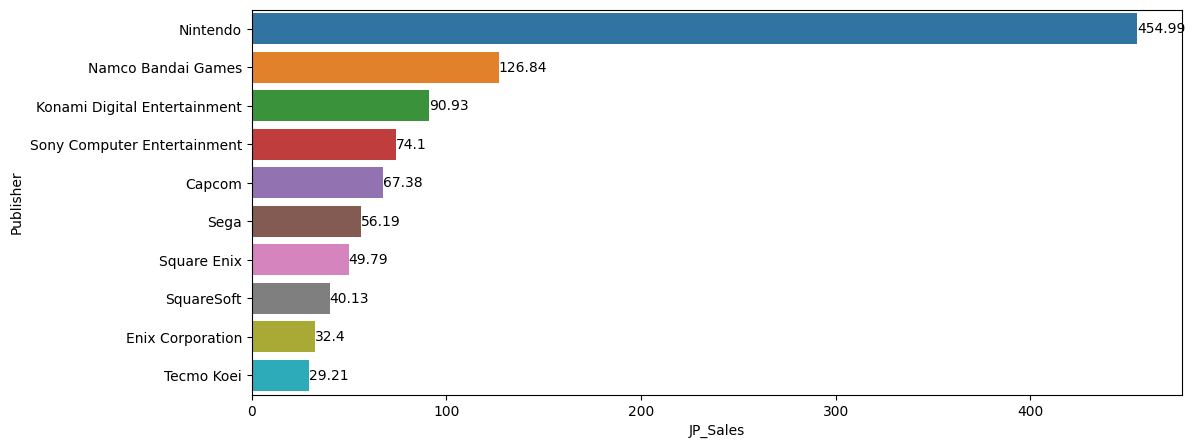

In [ ]:
# Japan publisher sales
most_sales('Publisher', 'JP_Sales', df)

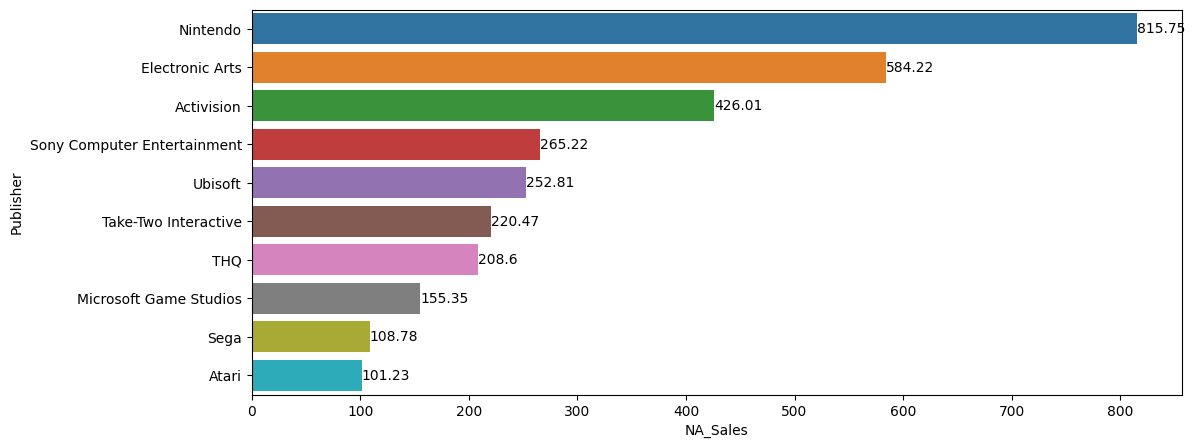

In [ ]:
# North America publisher sales
most_sales('Publisher', 'NA_Sales', df)

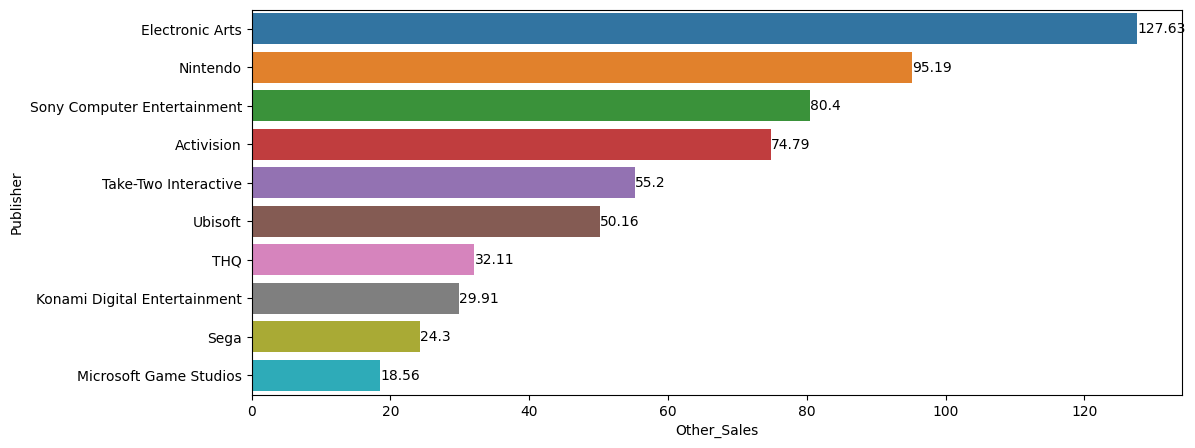

In [ ]:
# Other publisher sales
most_sales('Publisher', 'Other_Sales', df)

<Axes: xlabel='count', ylabel='Genre'>

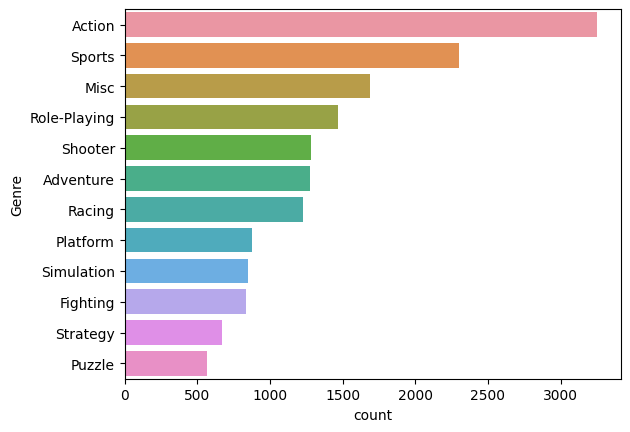

In [ ]:
# most popular genres
sns.countplot(y='Genre', data=df,order=df.Genre.value_counts().index)

### Platforms

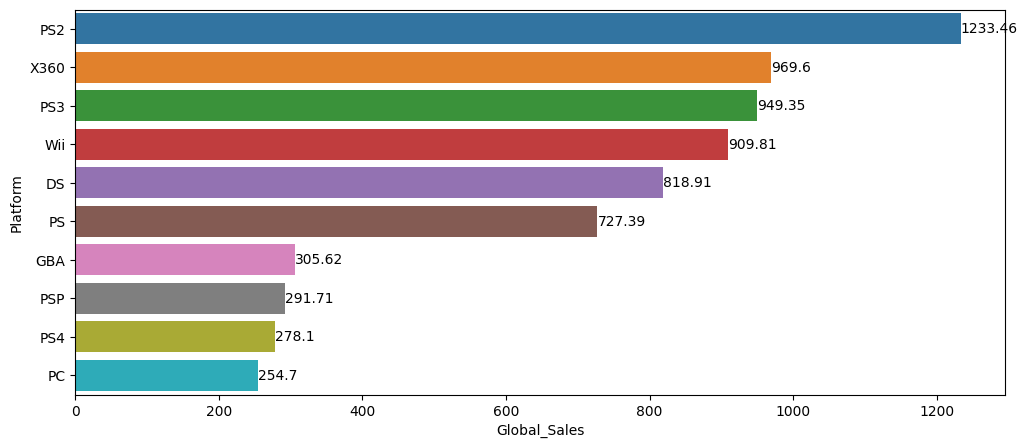

In [ ]:
# Global platform sales
most_sales('Platform', 'Global_Sales', df)

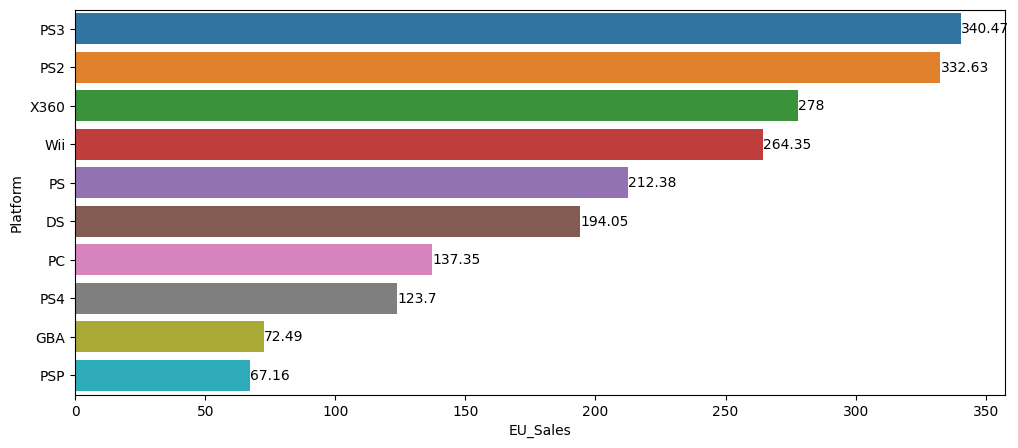

In [ ]:
# EU platform sales
most_sales('Platform', 'EU_Sales', df)

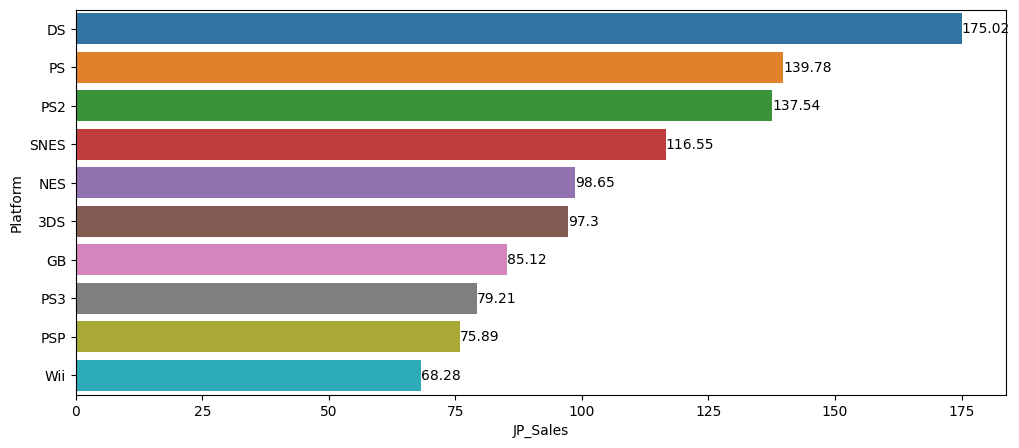

In [ ]:
# Japan platform sales
most_sales('Platform', 'JP_Sales', df)

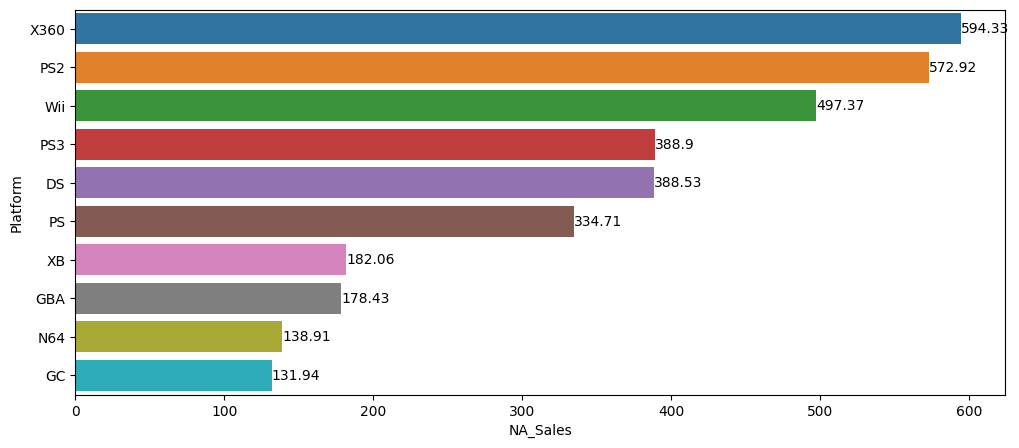

In [ ]:
# North America platform sales
most_sales('Platform', 'NA_Sales', df)

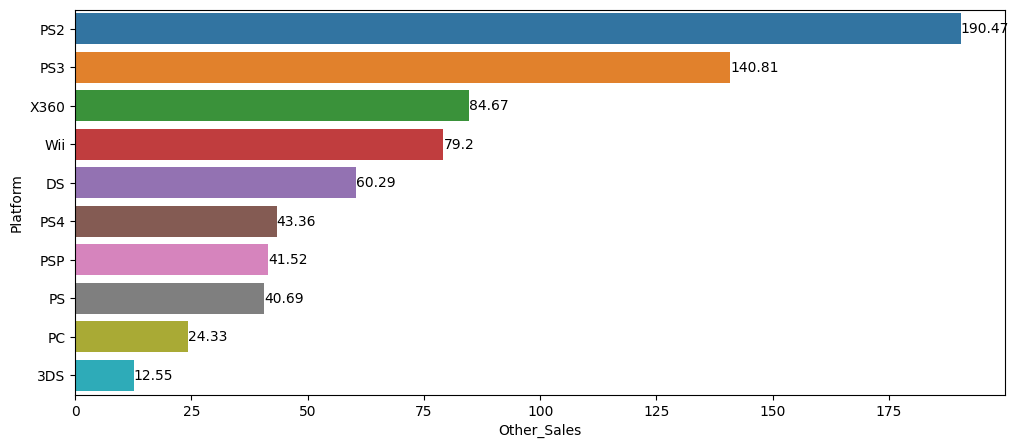

In [ ]:
# Other Sales platform sales
most_sales('Platform', 'Other_Sales', df)

### Publisher and Platform results

- It is evident that the most popular video game publisher with the most sales is: **Nintendo**

- As for the video game platform with the most sales is: **PlayStation 2**

# 2. Video Game Genre

<Axes: xlabel='count', ylabel='Genre'>

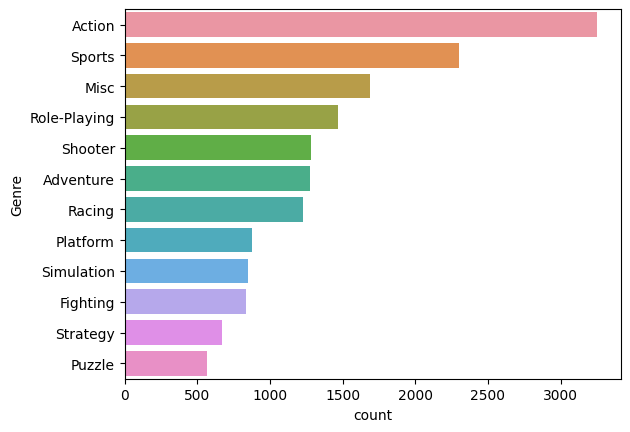

In [ ]:
# Most popular genre
sns.countplot(y='Genre', data=df, order=df.Genre.value_counts().index)

#### Further Genre Visualizations


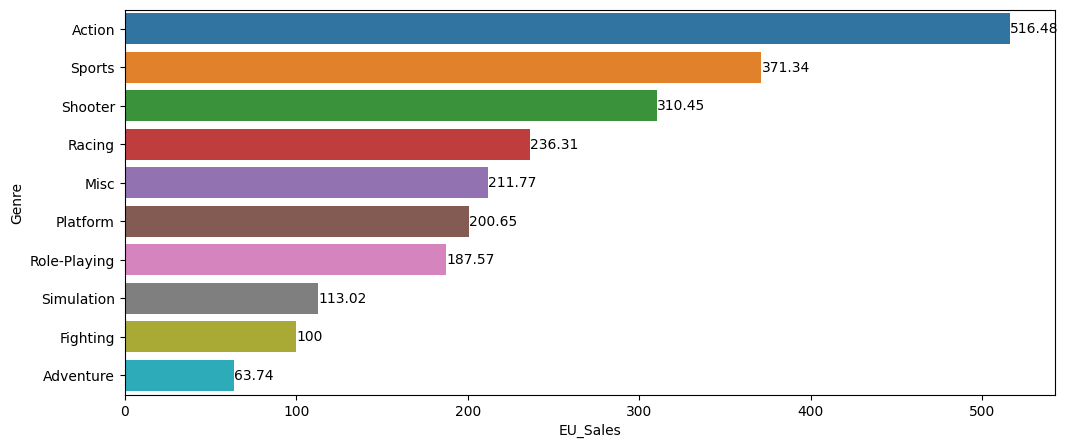

In [ ]:
# Popular genre in EU
most_sales('Genre', 'EU_Sales', df)

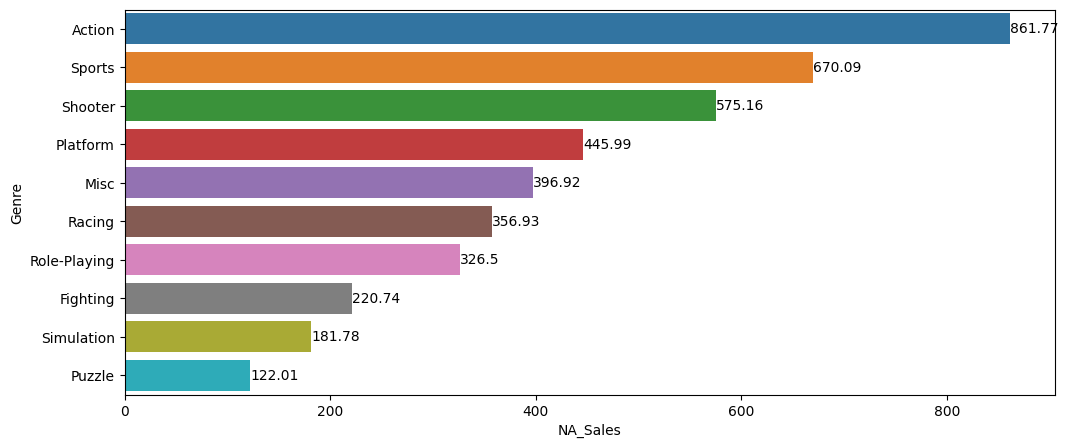

In [ ]:
# Popular genre in North America
most_sales('Genre', 'NA_Sales', df)

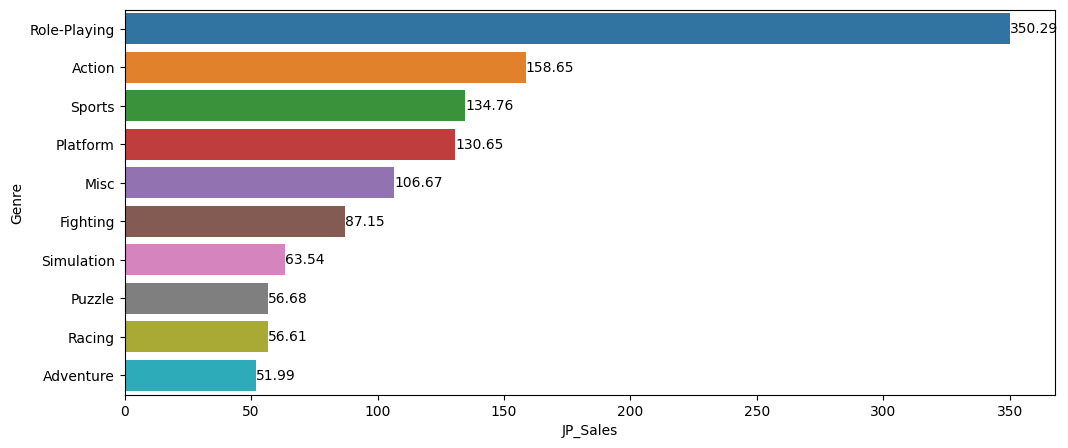

In [ ]:
# Popular genre in Japans
most_sales('Genre', 'JP_Sales', df)

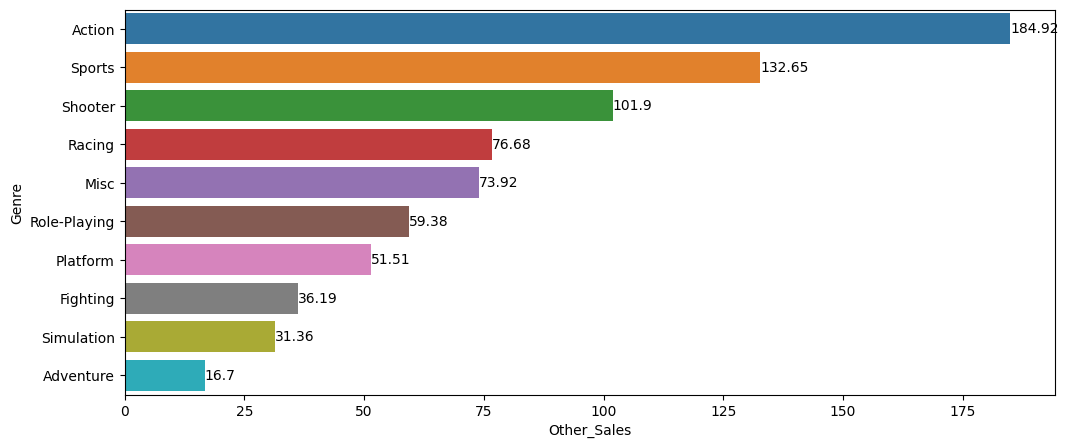

In [ ]:
# Popular genre in Other places
most_sales('Genre', 'Other_Sales', df)

### Genre Results

- The video game genre with the most sales from the data is: **Action games** with the second contender being **sports games**.

# 3 & 4. Most Popular Games

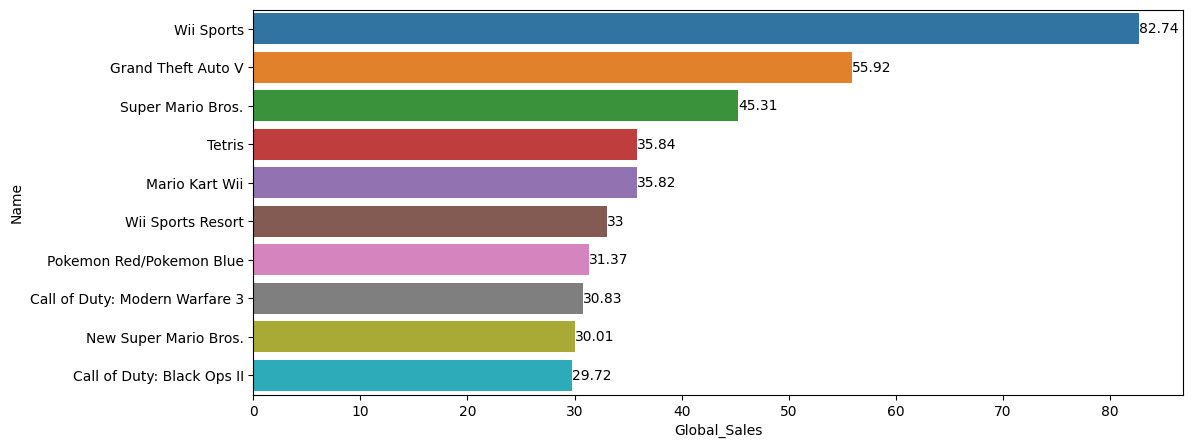

In [ ]:
# Top 10 Games with the most sales
most_sales('Name', 'Global_Sales', df)

<Axes: xlabel='count', ylabel='Name'>

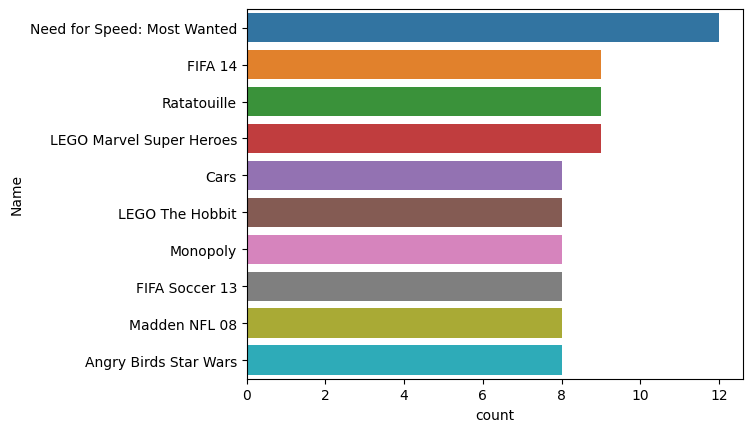

In [ ]:
# Top Frequent Games recorded in the data
sns.countplot(y="Name", data=df,order=df.Name.value_counts().iloc[:10].index)

#### Further Popular Game Visualizations


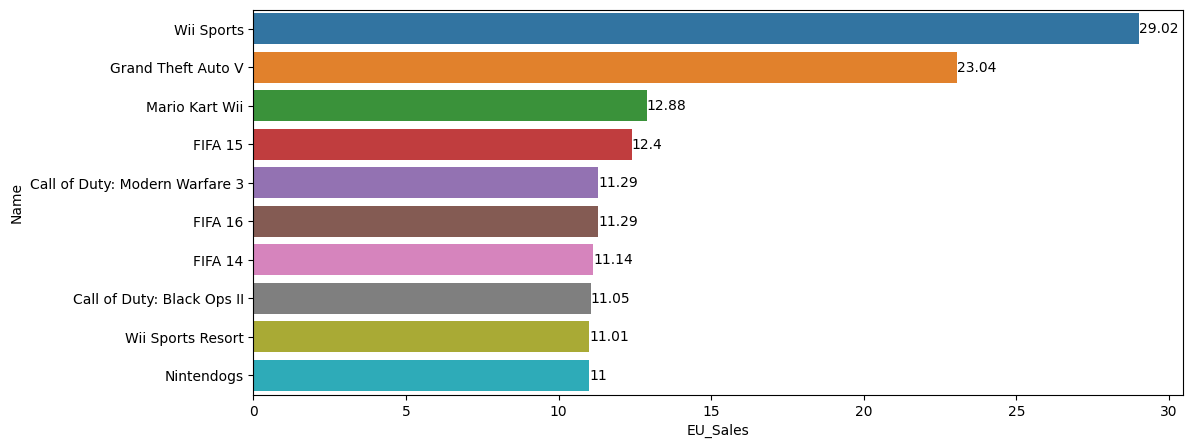

In [ ]:
# Popular genre in EU
most_sales('Name', 'EU_Sales', df)

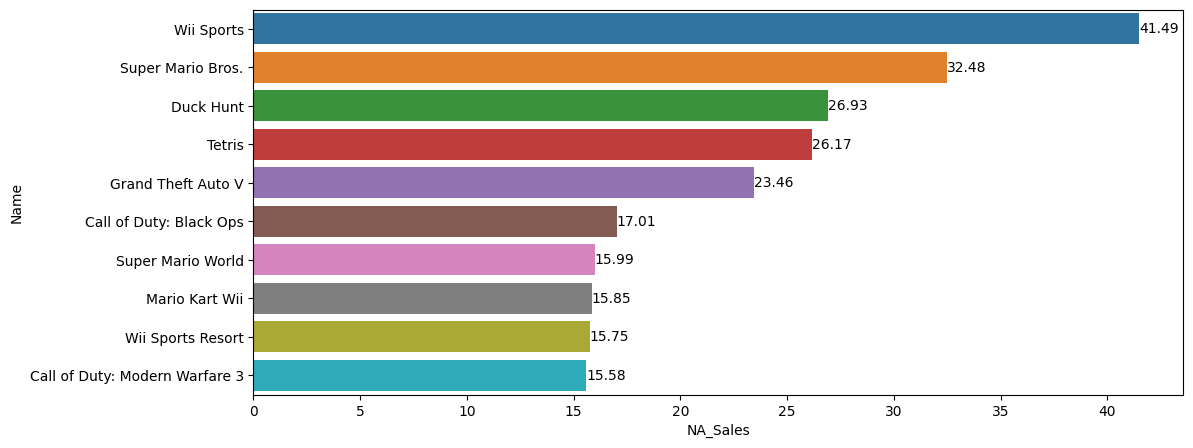

In [ ]:
# Popular genre in North America
most_sales('Name', 'NA_Sales', df)

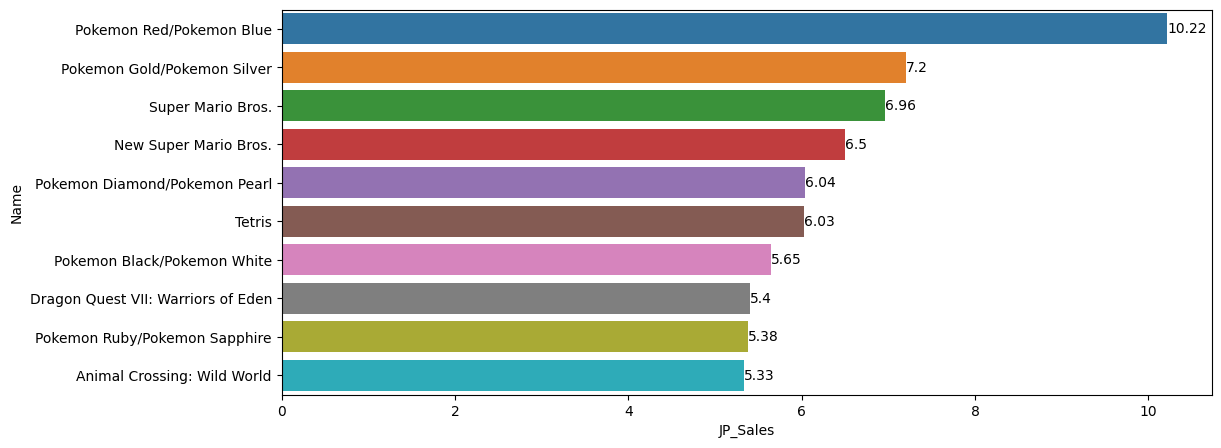

In [ ]:
# Popular genre in Japans
most_sales('Name', 'JP_Sales', df)

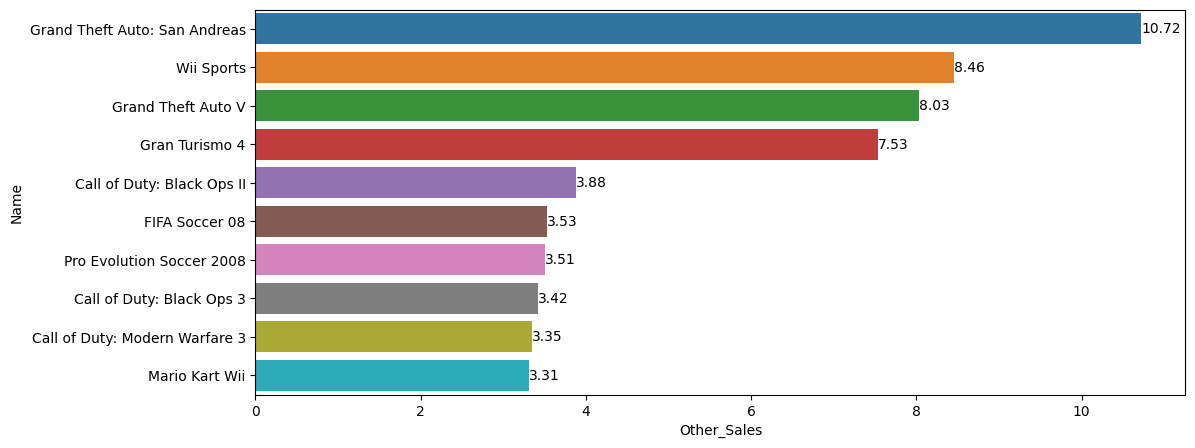

In [ ]:
# Popular genre in Other places
most_sales('Name', 'Other_Sales', df)

### Game results
- Overall the game with most sales is: **Wii Sports** with **Grand Theft Auto V** as a close second.

- Globaly, Europe and In North America **Wii Sports** is the game with most sales
As for Japan its **Pokemon red/pokemon blue** and lastly the popular game in other places is **Grand Theft Auto: San Andreas**

# 5. Year With Most Sales

Text(0.5, 1.0, 'Japan Sales')

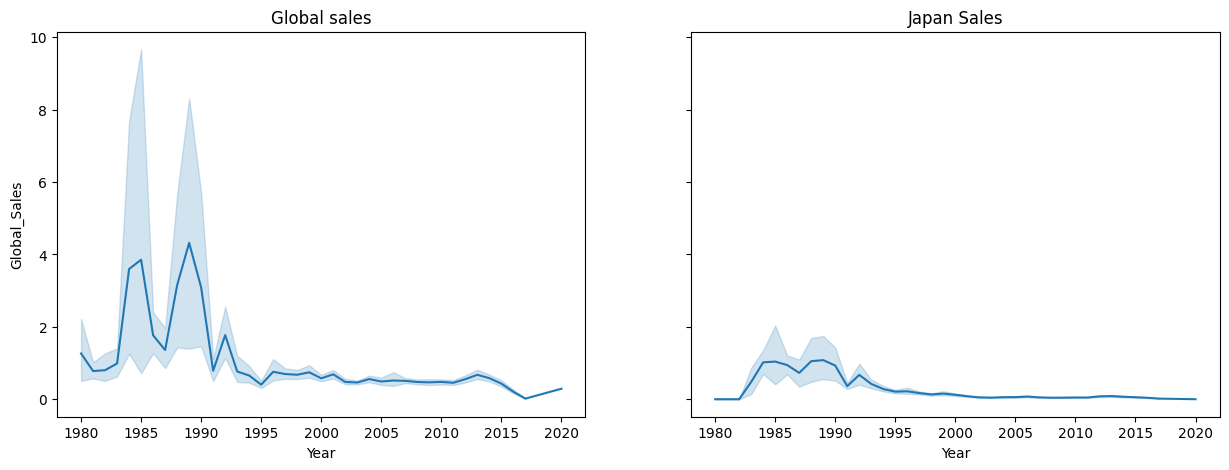

In [ ]:
# plot global and japan sales line plot
fig,axes = plt.subplots(1,2,figsize = (15,5),sharey=True)

sns.lineplot(ax = axes[0],x = df.Year, y= df.Global_Sales)
axes[0].set_title("Global sales")

sns.lineplot(ax = axes[1],x = df.Year, y=df.JP_Sales)
axes[1].set_title("Japan Sales")



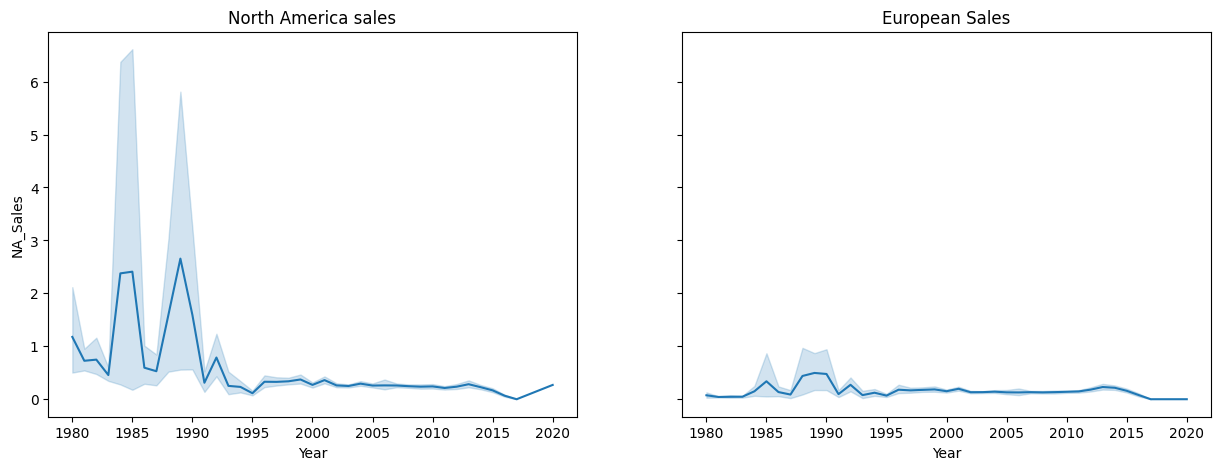

In [ ]:
# plot NA and EU sales line plot
fig,axes2 = plt.subplots(1,2,figsize = (15,5),sharey=True)
sns.lineplot(ax = axes2[0],x = df.Year, y= df.NA_Sales)
axes2[0].set_title("North America sales")

sns.lineplot(ax = axes2[1],x = df.Year, y=df.EU_Sales)
axes2[1].set_title("European Sales")
plt.show()

<Axes: xlabel='count', ylabel='Year'>

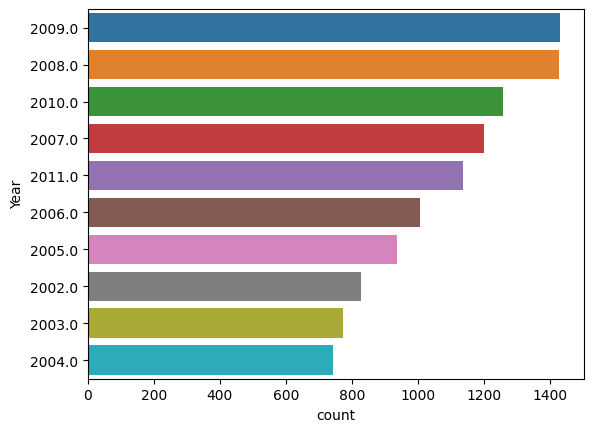

In [ ]:
# Year with the most sales
sns.countplot(y="Year", data=df,order=df.Year.value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='Name'>

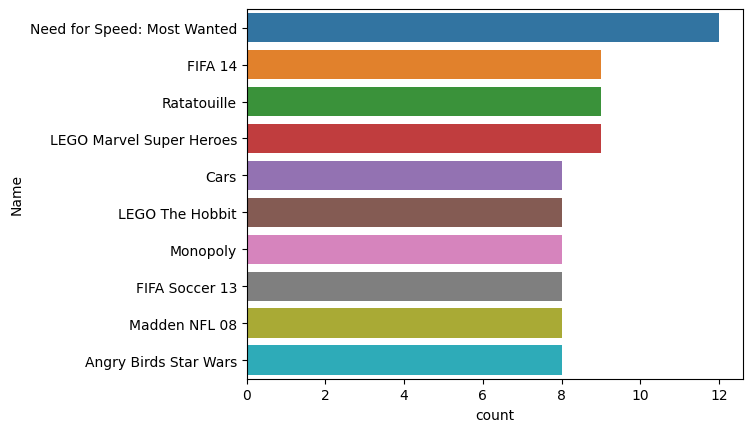

In [ ]:
# Top Frequent Games
sns.countplot(y="Name", data=df,order=df.Name.value_counts().iloc[:10].index)

### Year Results
- The year with the most video game sales was a tie between 2008 and 2009.